# About

test if we can use plotnine and plydata for viz

* https://pbpython.com/python-vis-flowchart.html
* https://github.com/has2k1/plotnine
* https://anaconda.org/conda-forge/plotnine

* https://github.com/has2k1/plydata


In [20]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

from plotnine import *

%matplotlib inline

In [2]:
# loads data
train_pd = pd.read_csv("../data/raw/train.csv.zip", compression="zip")
test_pd = pd.read_csv("../data/raw/test.csv.zip", compression="zip")

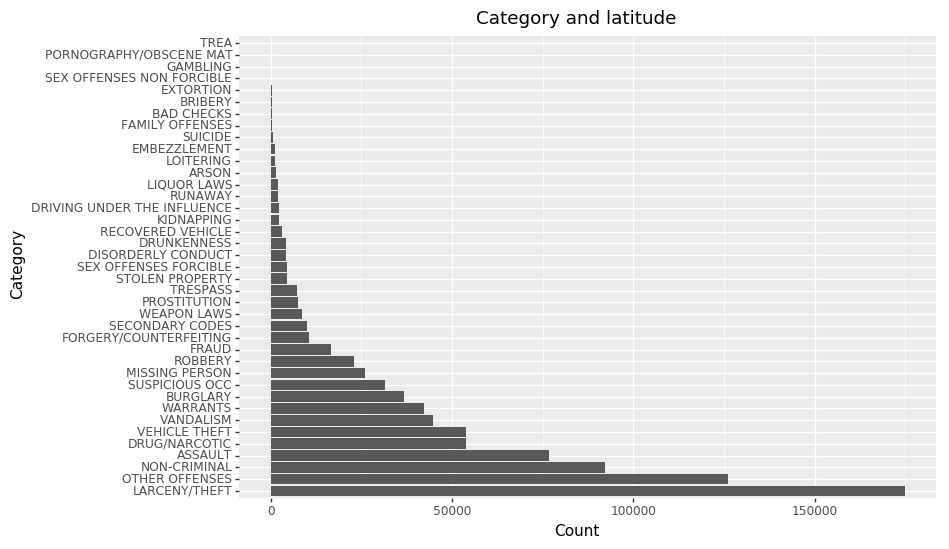

<ggplot: (112347197297)>

In [28]:
dat_list = train_pd["Category"].value_counts().index.tolist()
dat_cat = CategoricalDtype(categories = dat_list, ordered = True)

train_pd["Category_cat"] = train_pd["Category"].astype(str).astype(dat_cat)

# dat = train_pd.groupby(["Category"]).size().reset_index(name='counts').sort_values(by = "counts", ascending = False)
# # dat
# g = ggplot(dat, aes("Category", "counts")) + geom_col()
# g

(ggplot(train_pd)
 + aes(x='Category_cat')
 + geom_bar(size=20)
 + coord_flip()
 + labs(y='Count', x='Category', title='Category and latitude')
 + theme(figure_size=(9, 6))
)

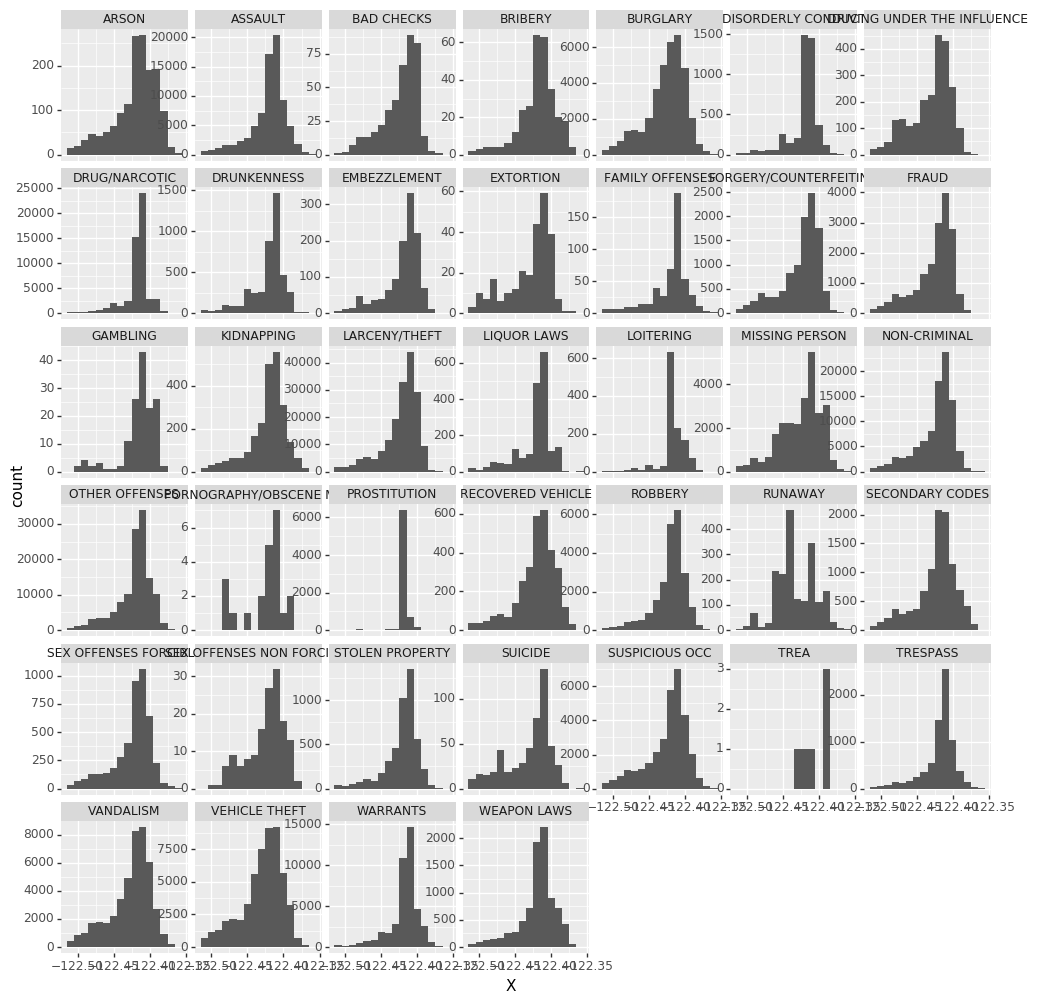

<ggplot: (112347427504)>

In [38]:
city = train_pd[["Category", "X", "Y"]].query("Y < 50")

g = ggplot(city, aes("X")) + \
    geom_histogram(binwidth = 0.01) + \
    facet_wrap("~Category", scales = "free_y") + \
    theme(figure_size=(12, 12))
g

In [39]:
city = train_pd[["Category", "X", "Y"]].query("Y < 50")

g = ggplot(city, aes("X")) + \
    geom_hexbin() + \
    facet_wrap("~Category", scales = "free_y") + \
    theme(figure_size=(12, 12))
g

NameError: name 'geom_hexbin' is not defined